In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv("../Datasets/Filter Jateng dan DM.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 41 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Nomor_peserta                                         426 non-null    int64  
 1   Nomor_keluarga                                        426 non-null    int64  
 2   Bobot                                                 426 non-null    float64
 3   ID_Kunjungan                                          426 non-null    object 
 4   Tanggal_kunjungan                                     426 non-null    object 
 5   Tanggal_tindakan                                      426 non-null    object 
 6   Tanggal_pulang                                        426 non-null    object 
 7   Provinsi_faskes                                       426 non-null    int64  
 8   Kode_Kab_Kota_faskes                                  426 no

In [ ]:
data.dtypes

Nomor_peserta                                             int64
Nomor_keluarga                                            int64
Bobot                                                   float64
ID_Kunjungan                                             object
Tanggal_kunjungan                                        object
Tanggal_tindakan                                         object
Tanggal_pulang                                           object
Provinsi_faskes                                           int64
Kode_Kab_Kota_faskes                                      int64
Kepemilikan_faskes                                        int64
Jenis_faskes                                              int64
Tipe_faskes                                               int64
Tingkat_layanan                                           int64
Segmen_peserta                                            int64
Kode_dan_Nama_diagnosis_berdasarkan_ICD_10__3_digit_      int64
Kode_diagnosis_berdasarkan_ICD_10__3_dig

In [ ]:
data['Tanggal_kunjungan'] = data['Tanggal_kunjungan'].astype('datetime64')
data['Tanggal_tindakan'] = data['Tanggal_tindakan'].astype('datetime64')
data['Tanggal_pulang'] = data['Tanggal_pulang'].astype('datetime64')
data['Tanggal_lahir_peserta'] = data['Tanggal_lahir_peserta'].astype('datetime64')

In [ ]:
data['Lama_tindakan'] = data['Tanggal_tindakan']-data['Tanggal_kunjungan']

In [ ]:
data['Lama_tindakan'].value_counts()

0 days    426
Name: Lama_tindakan, dtype: int64

In [ ]:
data['Lama_inap'] = data['Tanggal_pulang']-data['Tanggal_kunjungan']

In [ ]:
data['Lama_inap'].value_counts()

0 days    426
Name: Lama_inap, dtype: int64

In [ ]:
data["Kode_diagnosis_berdasarkan_ICD_10__3_digit_"].value_counts()

E11    401
E10     25
Name: Kode_diagnosis_berdasarkan_ICD_10__3_digit_, dtype: int64

In [ ]:
data['umur'] = 2021 - data['Tanggal_lahir_peserta'].dt.year
data['umur'].value_counts()


58    58
61    28
49    28
55    28
59    27
69    27
54    27
43    26
67    25
65    23
75    22
71    22
66    18
64    17
87    17
48    11
80     9
63     6
60     6
73     1
Name: umur, dtype: int64

In [ ]:
# selected = [
#     "Nomor_peserta",
#     "Nomor_keluarga",
#     "Bobot",
#     "Kode_Kab_Kota_faskes",
#     "Segmen_peserta",
#     "Kode_diagnosis_berdasarkan_ICD_10__3_digit_",
#     "Biaya_tagih",
#     "Hasil_Pemeriksaan_gula_darah_puasa__GDP__1",
#     "Tanggal_lahir_peserta",
#     "Hubungan_Keluarga",
#     "Jenis_Kelamin",
#     "Status_perkawinan",
#     "Kabupaten_Kota_Tempat_Tinggal_Peserta",
#     "Tahun_meninggal"
# ]
# selected

In [ ]:
# penghapusan kolom yang tidak berguna atau tidak diperlukan dari suatu dataset.
# data.drop(['ID_Kunjungan', 'Tanggal_kunjungan', 'Tanggal_tindakan', 'Tanggal_pulang', 'Provinsi_faskes', 'Kepemilikan_faskes', 'Jenis_faskes', 'Tipe_faskes', 'Tingkat_layanan', 'Kode_dan_Nama_diagnosis_berdasarkan_ICD_10__3_digit_', 'Kode_diagnosis__3_5_digit_', 'Nama_Diagnosis', 'Nama_Tindakan', 'Biaya_verifikasi', 'Hasil_Pemeriksaan_gula_darah_puasa__GDP__2', 'Nomor_peserta_1', 'Nomor_keluarga_1', 'Kelas_rawat', 'Segmentasi_peserta', 'Provinsi_Tempat_Tinggal_Peserta', 'Kepemilikan_faskes_1', 'Jenis_faskes_', 'Provinsi_Fasilitas_Kesehatan_Peserta_Terdaftar', 'Kabupaten_Kota_Fasilitas_Kesehatan_Peserta_Terdaftar', 'Bobot_1', 'Tahun_Sampel', 'Status_Kepesertaan'], axis= 1, inplace= True)
data.drop(['Nomor_peserta', 'Nomor_keluarga', 'Tahun_meninggal', 'Tanggal_lahir_peserta', 'Biaya_tagih', 'ID_Kunjungan', 'Tanggal_kunjungan', 'Tanggal_tindakan', 'Tanggal_pulang', 'Provinsi_faskes', 'Kepemilikan_faskes', 'Jenis_faskes', 'Tipe_faskes', 'Tingkat_layanan', 'Kode_dan_Nama_diagnosis_berdasarkan_ICD_10__3_digit_', 'Kode_diagnosis_berdasarkan_ICD_10__3_digit_', 'Nama_Diagnosis', 'Nama_Tindakan', 'Biaya_verifikasi', 'Hasil_Pemeriksaan_gula_darah_puasa__GDP__2', 'Nomor_peserta_1', 'Nomor_keluarga_1', 'Kelas_rawat', 'Segmentasi_peserta', 'Provinsi_Tempat_Tinggal_Peserta', 'Kepemilikan_faskes_1', 'Jenis_faskes_', 'Provinsi_Fasilitas_Kesehatan_Peserta_Terdaftar', 'Kabupaten_Kota_Fasilitas_Kesehatan_Peserta_Terdaftar', 'Bobot_1', 'Tahun_Sampel', 'Status_Kepesertaan','Lama_inap','Lama_tindakan'], axis= 1, inplace= True)

In [ ]:
data.head()

,Bobot,Kode_Kab_Kota_faskes,Segmen_peserta,Kode_diagnosis__3_5_digit_,Hasil_Pemeriksaan_gula_darah_puasa__GDP__1,Hubungan_Keluarga,Jenis_Kelamin,Status_perkawinan,Kabupaten_Kota_Tempat_Tinggal_Peserta,umur
0,9.918155,3311,5,E11,124.0,1,1,2,3508,71
1,13.108784,3376,1,E11,366.0,1,1,2,3525,58
2,8.448109,3302,1,E104,87.0,1,2,2,1504,60
3,8.448109,3302,1,E104,188.0,1,2,2,1504,60
4,8.448109,3302,1,E104,130.0,1,2,2,1504,60


In [ ]:
data.dtypes

Bobot                                         float64
Kode_Kab_Kota_faskes                            int64
Segmen_peserta                                  int64
Kode_diagnosis__3_5_digit_                     object
Hasil_Pemeriksaan_gula_darah_puasa__GDP__1    float64
Hubungan_Keluarga                               int64
Jenis_Kelamin                                   int64
Status_perkawinan                               int64
Kabupaten_Kota_Tempat_Tinggal_Peserta           int64
umur                                            int64
dtype: object

In [ ]:
# status_kehidupan = []

# for x in data["Tahun_meninggal"]:
#   if x > 0: # Nilai Mean Tahun_meninggal
#     status_kehidupan.append('0') # komplikasi
#   else:
#     status_kehidupan.append('1') # tidak komplikasi

# data["Tahun_meninggal"] = status_kehidupan
# data["Tahun_meninggal"]

In [ ]:
#  penghitungan dan pengelompokan kolom dalam suatu dataset berdasarkan tipe datanya.
cat_columns = data.select_dtypes(object).columns.to_list()
print(f"Kolom Kategori: {cat_columns}")
print()
num_columns = data.select_dtypes(np.number).columns.to_list()
print(f"Kolom Number: {num_columns}")
print()

Kolom Kategori: ['Kode_diagnosis__3_5_digit_']

Kolom Number: ['Bobot', 'Kode_Kab_Kota_faskes', 'Segmen_peserta', 'Hasil_Pemeriksaan_gula_darah_puasa__GDP__1', 'Hubungan_Keluarga', 'Jenis_Kelamin', 'Status_perkawinan', 'Kabupaten_Kota_Tempat_Tinggal_Peserta', 'umur']



In [ ]:
# missing value data
data.isnull().sum()

Bobot                                         0
Kode_Kab_Kota_faskes                          0
Segmen_peserta                                0
Kode_diagnosis__3_5_digit_                    0
Hasil_Pemeriksaan_gula_darah_puasa__GDP__1    0
Hubungan_Keluarga                             0
Jenis_Kelamin                                 0
Status_perkawinan                             0
Kabupaten_Kota_Tempat_Tinggal_Peserta         0
umur                                          0
dtype: int64

In [ ]:
# menghitung jumlah nilai unik (distinct) dalam setiap kolom DataFrame data.
unique_counts = data.nunique()
print(unique_counts)

Bobot                                          29
Kode_Kab_Kota_faskes                           17
Segmen_peserta                                  5
Kode_diagnosis__3_5_digit_                      5
Hasil_Pemeriksaan_gula_darah_puasa__GDP__1    284
Hubungan_Keluarga                               3
Jenis_Kelamin                                   2
Status_perkawinan                               2
Kabupaten_Kota_Tempat_Tinggal_Peserta          28
umur                                           20
dtype: int64


In [ ]:
data = data[data['Kode_diagnosis__3_5_digit_'] != 'E11']

In [ ]:
# Menghitung jumlah data dari kolom Kode diagnosis_berdasarkan ICD 10 (3digit)
print(f"Total categories pada kolom Kode diagnosis_berdasarkan ICD 10 (3digit):\n{data['Kode_diagnosis__3_5_digit_'].value_counts()}")

Total categories pada kolom Kode diagnosis_berdasarkan ICD 10 (3digit):
E119    398
E109     22
E104      3
E118      1
Name: Kode_diagnosis__3_5_digit_, dtype: int64


In [ ]:
# Menghitung jumlah data dari kolom Jenis Kelamin
print(f"Total categories pada kolom Jenis Kelamin:\n{data['Jenis_Kelamin'].value_counts()}")

Total categories pada kolom Jenis Kelamin:
2    226
1    198
Name: Jenis_Kelamin, dtype: int64


**Jenis kelamin:**
1. Laki
2. Perempuan

In [ ]:
# Daftar variabel kategorikal dengan mengidentifikasi tipe data "object"
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Variabel kategorikal dalam dataset:", object_cols)

Variabel kategorikal dalam dataset: ['Kode_diagnosis__3_5_digit_']


In [ ]:
# Inisialisasi objek LabelEncoder
LE = LabelEncoder()

# Melakukan label encoding untuk setiap variabel kategorikal
for i in object_cols:
    data[i] = LE.fit_transform(data[i])

print("Semua fitur sekarang bersifat numerik")

Semua fitur sekarang bersifat numerik


In [ ]:
data["Kode_diagnosis__3_5_digit_"].value_counts()

3    398
1     22
0      3
2      1
Name: Kode_diagnosis__3_5_digit_, dtype: int64

In [ ]:
# selected = [
#     "Nomor_peserta",
#     "Nomor_keluarga",
#     "Bobot",
#     "Kode_Kab_Kota_faskes",
#     "Segmen_peserta",
#     "Kode_diagnosis_berdasarkan_ICD_10__3_digit_",
#     "Biaya_tagih",
#     "Hasil_Pemeriksaan_gula_darah_puasa__GDP__1",
#     "Tanggal_lahir_peserta",
#     "Hubungan_Keluarga",
#     "Jenis_Kelamin",
#     "Status_perkawinan",
#     "Kabupaten_Kota_Tempat_Tinggal_Peserta",
#     "Tahun_meninggal"
# ]
# data_selected = data[selected]

# X = data_selected.drop(columns="Kode_diagnosis_berdasarkan_ICD_10__3_digit_").values # atribut
# y = data_selected["Kode_diagnosis_berdasarkan_ICD_10__3_digit_"].values #kelas/target

In [ ]:
X = data.drop(columns="Kode_diagnosis__3_5_digit_") # atribut
y = data["Kode_diagnosis__3_5_digit_"] #kelas/target

In [ ]:
# split data dengan proporsi 70:30

from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X,y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Object Scaling / Normalisasi hanya di fit ke data training

scaler = MinMaxScaler()
columns = list(X_train.columns)
scaler.fit(X_train[columns])

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# jika ingin tetap dalam bentuk dataframe, nilai hasil scaling dapat di assign ke kolom awal
X_train[columns] = X_train_scaled
X_test[columns] = X_test_scaled

In [ ]:
X_train.head()

,Bobot,Kode_Kab_Kota_faskes,Segmen_peserta,Hasil_Pemeriksaan_gula_darah_puasa__GDP__1,Hubungan_Keluarga,Jenis_Kelamin,Status_perkawinan,Kabupaten_Kota_Tempat_Tinggal_Peserta,umur
398,0.871148,0.240000,0.75,0.227550,0.0,0.0,0.0,0.433627,0.113636
120,0.906077,0.013333,0.75,0.283455,1.0,1.0,0.0,0.039784,0.386364
116,0.399404,0.933333,0.75,0.166853,1.0,1.0,0.0,0.440824,0.136364
301,0.954824,0.200000,0.00,0.432003,0.0,1.0,1.0,0.420232,0.840909
424,1.000000,0.226667,0.00,0.179631,1.0,1.0,0.0,0.412835,0.590909


MELIHAT KORELASI

In [ ]:
X_train.describe()

,Bobot,Kode_Kab_Kota_faskes,Segmen_peserta,Hasil_Pemeriksaan_gula_darah_puasa__GDP__1,Hubungan_Keluarga,Jenis_Kelamin,Status_perkawinan,Kabupaten_Kota_Tempat_Tinggal_Peserta,umur
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,0.666714,0.584324,0.387669,0.172695,0.331081,0.533784,0.135135,0.353835,0.422758
std,0.340390,0.401815,0.439385,0.152874,0.460486,0.499702,0.342447,0.194817,0.226118
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.429508,0.200000,0.000000,0.042145,0.000000,0.000000,0.000000,0.138944,0.272727
50%,0.822403,0.933333,0.000000,0.162061,0.000000,1.000000,0.000000,0.420232,0.409091
75%,0.906077,0.973333,0.750000,0.256701,1.000000,1.000000,0.000000,0.444022,0.545455
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

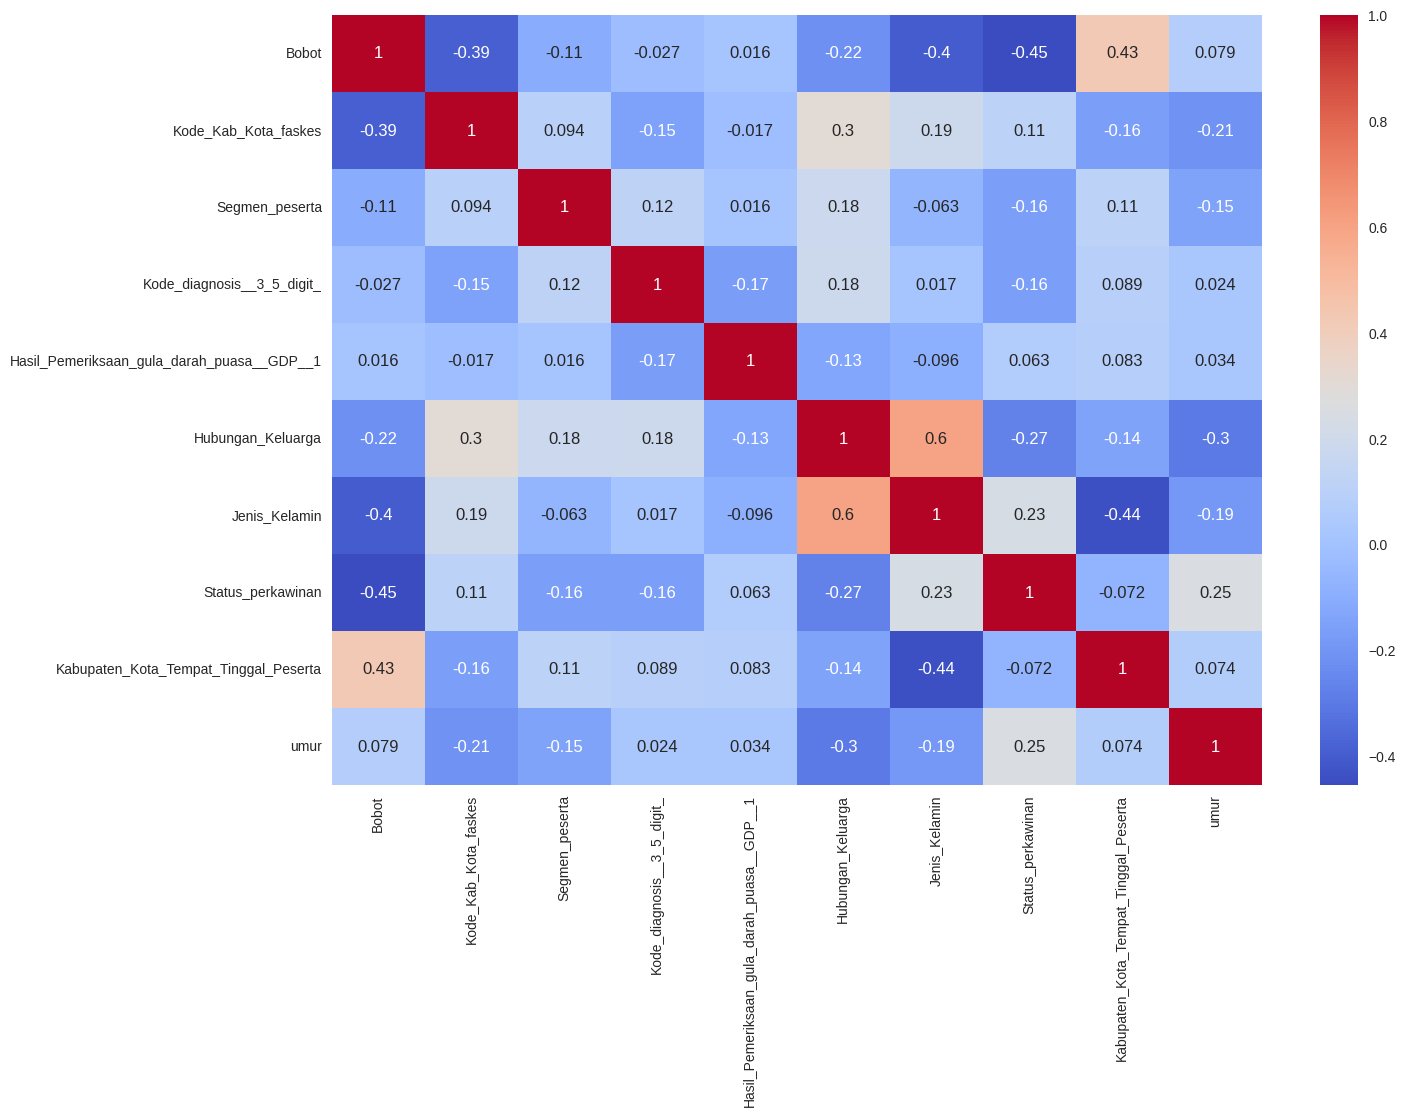

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True,cmap='coolwarm')

HANDLING CLASS IMBLANCE

In [ ]:
y_train.value_counts()

3    283
1     11
0      2
Name: Kode_diagnosis__3_5_digit_, dtype: int64

Text(0.5, 1.0, 'Perbandingan Tipe DM')

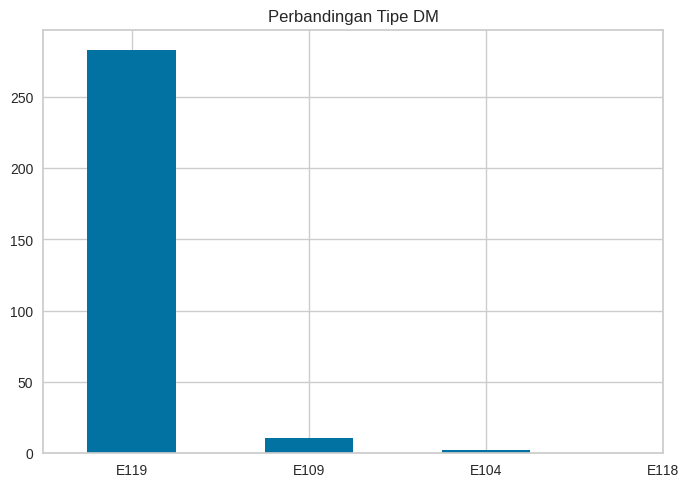

In [ ]:
y_train.value_counts().plot(kind='bar')
plt.xticks([0, 1, 2, 3],['E119','E109','E104','E118'], rotation=0)
plt.title('Perbandingan Tipe DM')

In [ ]:
'''from imblearn.over_sampling import SMOTE

# sampling strategi 1 artinya data minoritas akan ditambahkan data sintetis hingga perbandingan akan dibuat 1:1
# sampling hanya digunakan untuk data train

#sampling_strategy = {4: 398, 1: 398, 0: 398, 2: 398, 3: 398}

# Set n_neighbors to a value <= number of samples you have
#k_neighbors = 2  # Adjust this based on your dataset size

#smote = SMOTE(sampling_strategy=sampling_strategy, k_neighbors=k_neighbors)
#X_smote, y_smote = smote.fit_resample(X_train, y_train)

from imblearn.over_sampling import RandomOverSampler

# Definisikan RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Lakukan oversampling pada data train
X_train_oversampled, y_train_oversampled = ros.fit_resample(X_train, y_train)

from imblearn.combine import SMOTETomek

# Inisialisasi SMOTETomek dengan proporsi 1:1
smote_tomek = SMOTETomek(sampling_strategy='auto', random_state=42)

# Oversampling dengan SMOTETomek pada data train
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)
'''

"from imblearn.over_sampling import SMOTE\n\n# sampling strategi 1 artinya data minoritas akan ditambahkan data sintetis hingga perbandingan akan dibuat 1:1\n# sampling hanya digunakan untuk data train\n\n#sampling_strategy = {4: 398, 1: 398, 0: 398, 2: 398, 3: 398}\n\n# Set n_neighbors to a value <= number of samples you have\n#k_neighbors = 2  # Adjust this based on your dataset size\n\n#smote = SMOTE(sampling_strategy=sampling_strategy, k_neighbors=k_neighbors)\n#X_smote, y_smote = smote.fit_resample(X_train, y_train)\n\nfrom imblearn.over_sampling import RandomOverSampler\n\n# Definisikan RandomOverSampler\nros = RandomOverSampler(random_state=42)\n\n# Lakukan oversampling pada data train\nX_train_oversampled, y_train_oversampled = ros.fit_resample(X_train, y_train)\n\nfrom imblearn.combine import SMOTETomek\n\n# Inisialisasi SMOTETomek dengan proporsi 1:1\nsmote_tomek = SMOTETomek(sampling_strategy='auto', random_state=42)\n\n# Oversampling dengan SMOTETomek pada data train\nX_tra

In [ ]:
'''
y_train_oversampled.value_counts().plot(kind='bar')
plt.xticks([0, 1, 2, 3, 4],['4','1','0','3','2'], rotation=0)
plt.title('Perbandingan Tipe DM')
'''

"\ny_train_oversampled.value_counts().plot(kind='bar')\nplt.xticks([0, 1, 2, 3, 4],['4','1','0','3','2'], rotation=0)\nplt.title('Perbandingan Tipe DM')\n"

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# MODELING DECISION TREE

In [ ]:
# DecisionTreeClassifier?

In [ ]:
# Melatih model Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Melakukan prediksi pada data pengujian
y_pred = decision_tree.predict(X_test)
'''
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100
'''
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='macro') * 100
recall = recall_score(y_test, y_pred, average='macro') * 100
f1 = f1_score(y_test, y_pred, average='macro') * 100

print("Akurasi: {:.2f}%".format(accuracy))
print("Presisi: {:.2f}%".format(precision))
print("Recall: {:.2f}%".format(recall))
print("Skor F1: {:.2f}%".format(f1))

Akurasi: 95.31%
Presisi: 68.10%
Recall: 69.80%
Skor F1: 68.91%


In [ ]:
import joblib

# Export the trained model to a file
joblib.dump(decision_tree, 'decision_tree_model.joblib')

# Load the model from the file
loaded_model = joblib.load('decision_tree_model.joblib')

# Make predictions using the loaded model
loaded_y_pred = loaded_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='macro') * 100
recall = recall_score(y_test, y_pred, average='macro') * 100
f1 = f1_score(y_test, y_pred, average='macro') * 100

print("Akurasi: {:.2f}%".format(accuracy))
print("Presisi: {:.2f}%".format(precision))
print("Recall: {:.2f}%".format(recall))
print("Skor F1: {:.2f}%".format(f1))

Akurasi: 95.31%
Presisi: 68.10%
Recall: 69.80%
Skor F1: 68.91%


[Text(0.30303030303030304, 0.9444444444444444, 'x[1] <= 0.987\ngini = 0.084\nsamples = 296\nvalue = [2, 11, 283]'),
 Text(0.18181818181818182, 0.8333333333333334, 'x[1] <= 0.033\ngini = 0.014\nsamples = 277\nvalue = [2, 0, 275]'),
 Text(0.12121212121212122, 0.7222222222222222, 'x[2] <= 0.375\ngini = 0.278\nsamples = 12\nvalue = [2, 0, 10]'),
 Text(0.06060606060606061, 0.6111111111111112, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.18181818181818182, 0.6111111111111112, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 10]'),
 Text(0.24242424242424243, 0.7222222222222222, 'gini = 0.0\nsamples = 265\nvalue = [0, 0, 265]'),
 Text(0.42424242424242425, 0.8333333333333334, 'x[5] <= 0.5\ngini = 0.488\nsamples = 19\nvalue = [0, 11, 8]'),
 Text(0.36363636363636365, 0.7222222222222222, 'x[3] <= 0.011\ngini = 0.5\nsamples = 16\nvalue = [0, 8, 8]'),
 Text(0.30303030303030304, 0.6111111111111112, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.42424242424242425, 0.6111111111111112, 'x[3] 

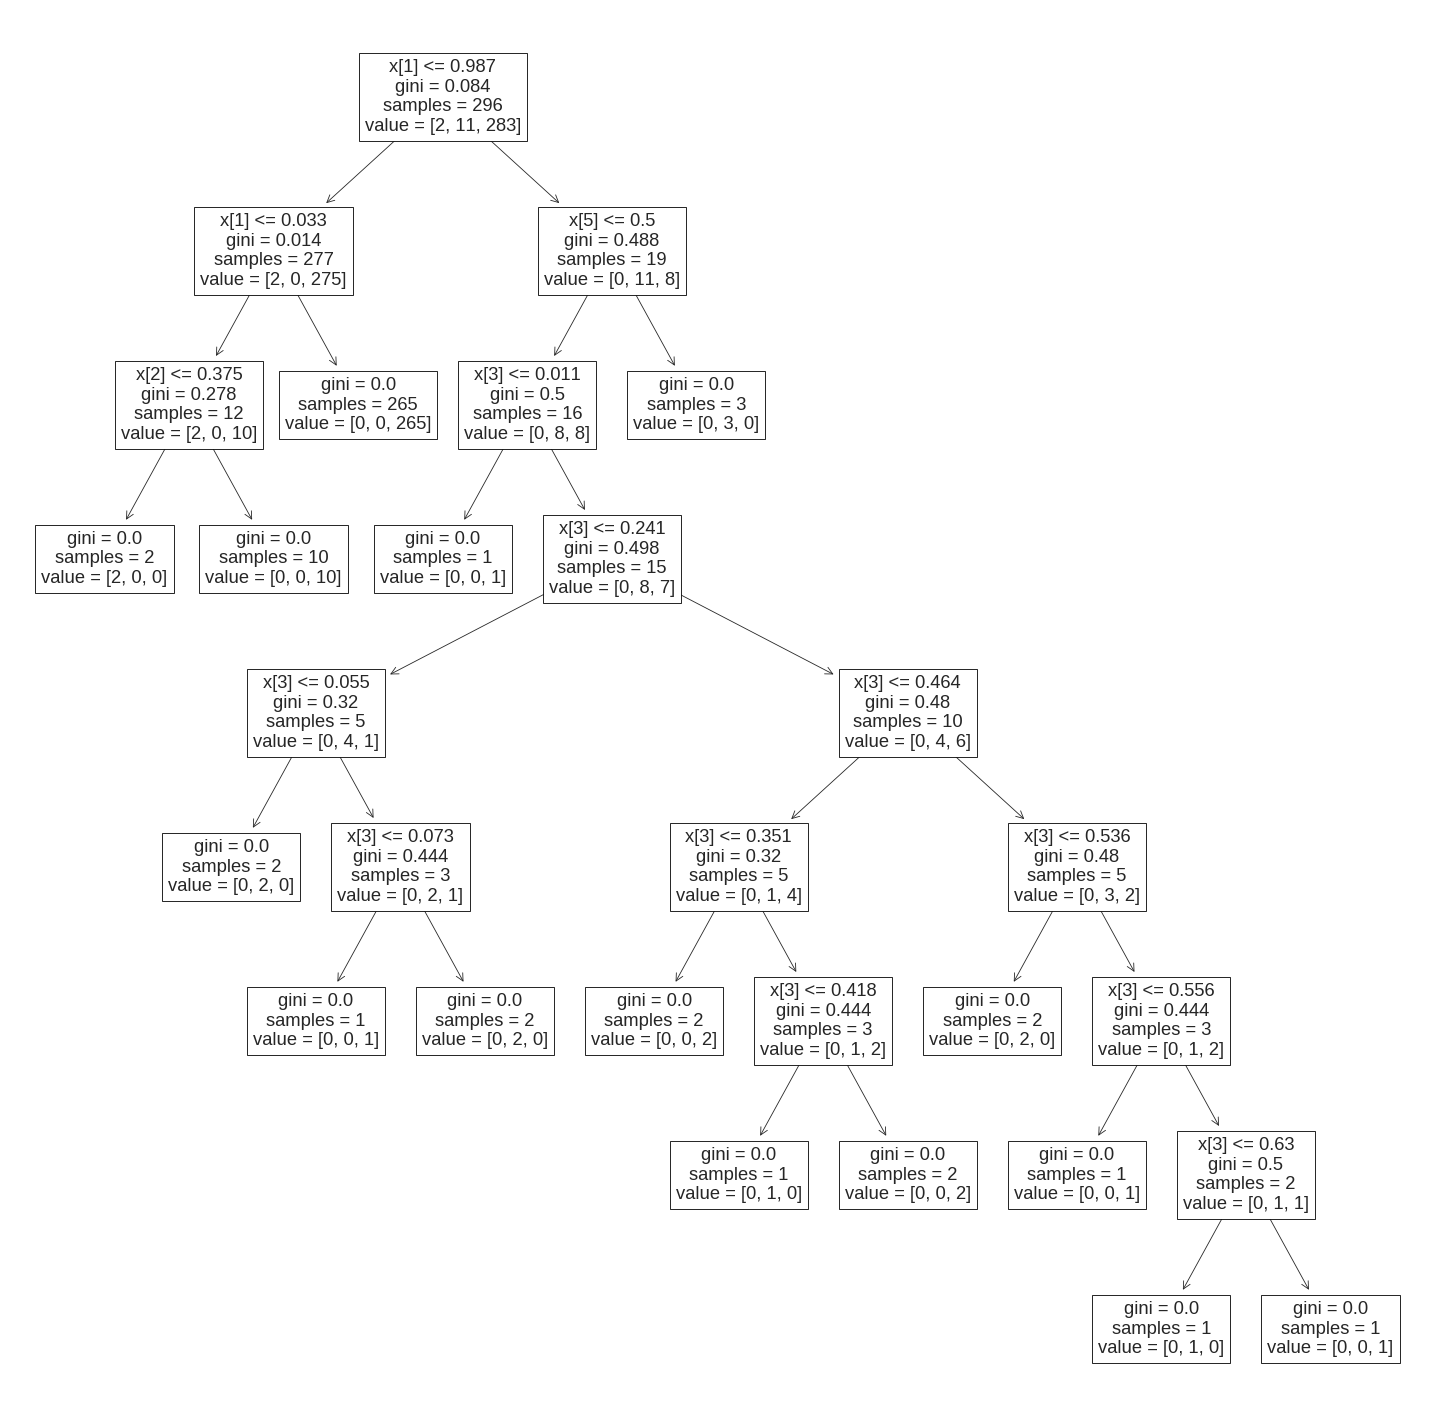

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (9,9), dpi=200)
tree.plot_tree(dtc)

In [ ]:
# from sklearn.tree import DecisionTreeClassifier, plot_tree
# import matplotlib.pyplot as plt

# # Create and fit the DecisionTreeClassifier
# dtc = DecisionTreeClassifier()
# dtc.fit(X_train, y_train)

# # Create a figure and axis for the tree plot
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10), dpi=300)

# # Plot the decision tree with feature names
# plot_tree(
#     dtc,
#     filled=True,
#     feature_names=X_train.columns,
#     class_names=['Label 1', 'Label 2', 'Label 3'],
#     ax=ax
# )

# # Show the plot
# plt.show()

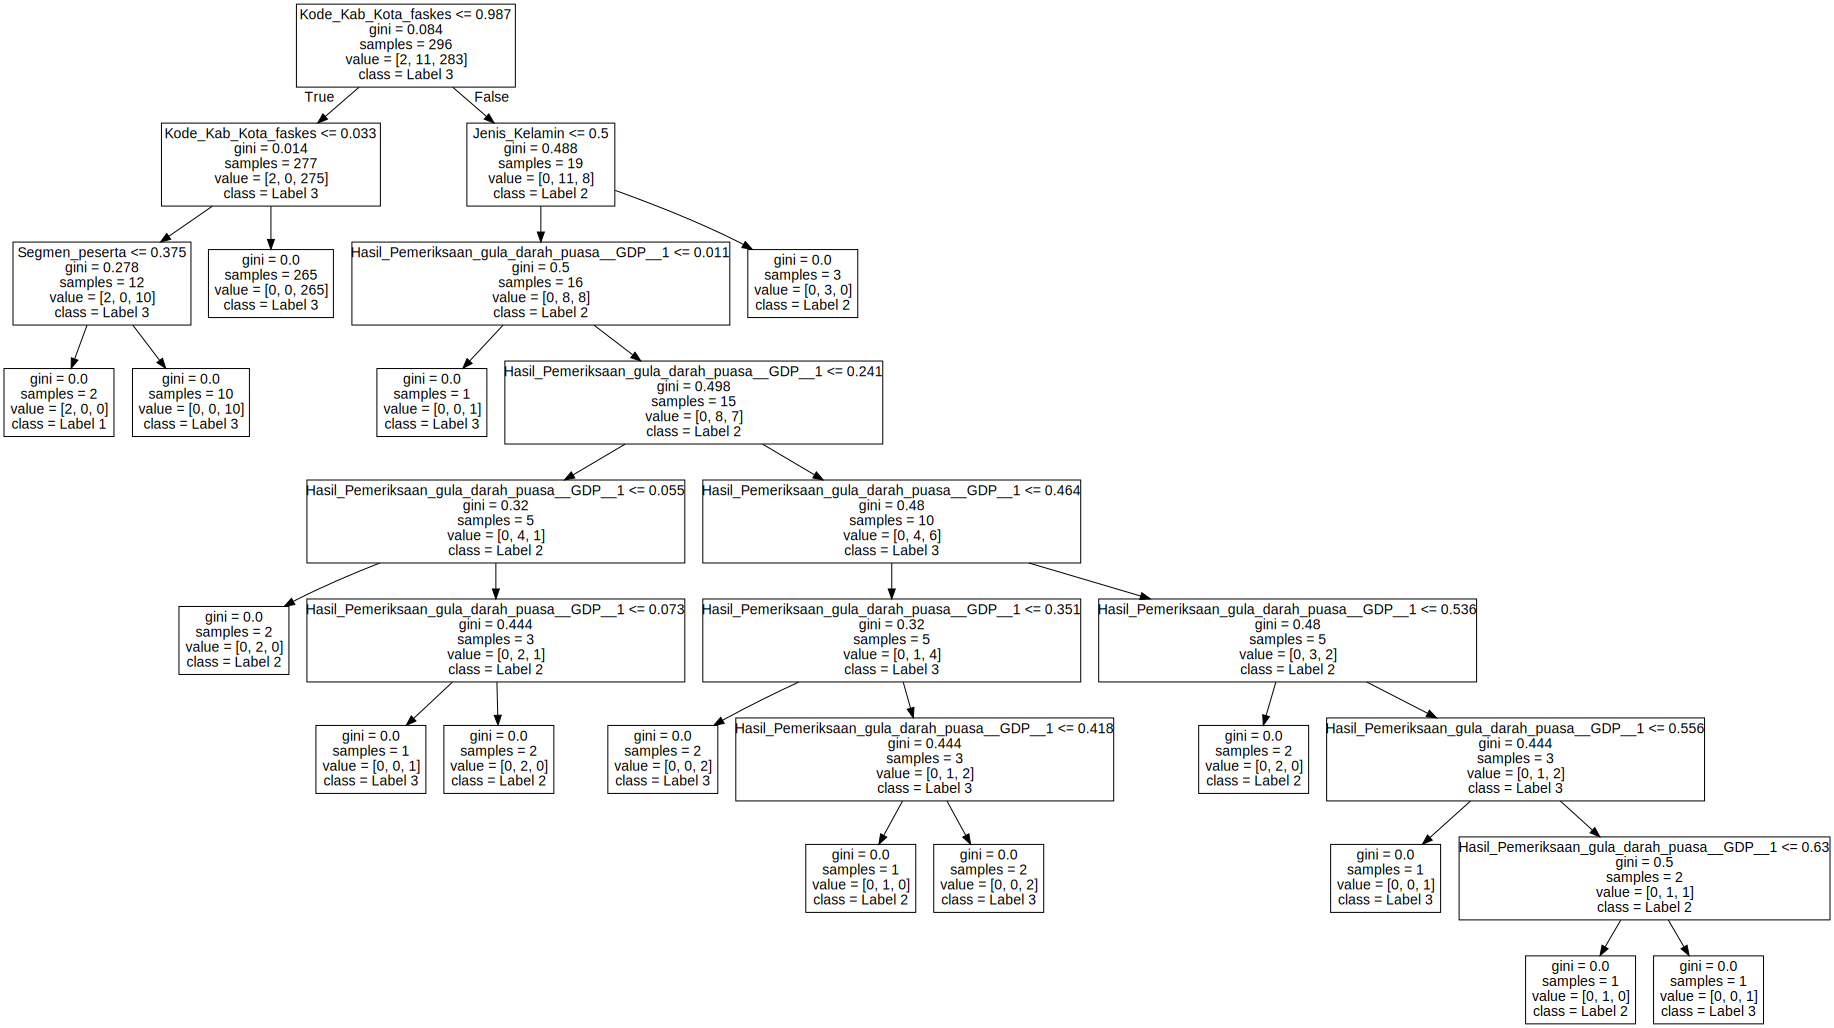

In [ ]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(dtc, out_file=None,
                                feature_names=X_train.columns,
                                class_names=['Label 1', 'Label 2', 'Label 3'],
                                #filled=True
                                )

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph.render("decision_tree_graphivz")
graph

Dari hasil penggunaan algoritma menggunakan Decision Tree menunjukan 85% akurasinya, sehingga menunjukkan bahwa model Decision Tree yang dibangun relatif baik dalam memprediksi data.

# MODELING RANDOM FOREST

In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Melatih Random Forest Classifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Melakukan prediksi pada data pengujian
y_pred = random_forest.predict(X_test)

'''
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100
'''
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='macro') * 100
recall = recall_score(y_test, y_pred, average='macro') * 100
f1 = f1_score(y_test, y_pred, average='macro') * 100

# Menampilkan hasil evaluasi dengan persentase
print("Akurasi: {:.2f}%".format(accuracy))
print("Presisi: {:.2f}%".format(precision))
print("Recall: {:.2f}%".format(recall))
print("Skor F1: {:.2f}%".format(f1))

Akurasi: 95.31%
Presisi: 68.10%
Recall: 69.80%
Skor F1: 68.91%


Dari hasil penggunaan algoritma menggunakan Random Forest menunjukan 86% akurasinya, sehingga menunjukkan bahwa model Random Forest yang dibangun relatif baik dalam memprediksi data.

# MODELING LOGISTIK REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Membuat objek model Logistic Regression
logreg = LogisticRegression()

# Melatih model dengan data pelatihan
logreg.fit(X_train, y_train)

# Melakukan prediksi pada data pengujian
y_pred = logreg.predict(X_test)

'''
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100
'''
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='macro') * 100
recall = recall_score(y_test, y_pred, average='macro') * 100
f1 = f1_score(y_test, y_pred, average='macro') * 100

# Menampilkan hasil evaluasi dengan persentase
print("Akurasi: {:.2f}%".format(accuracy))
print("Presisi: {:.2f}%".format(precision))
print("Recall: {:.2f}%".format(recall))
print("Skor F1: {:.2f}%".format(f1))

Akurasi: 89.84%
Presisi: 22.46%
Recall: 25.00%
Skor F1: 23.66%


Dari hasil penggunaan algoritma menggunakan Logistik Regression menunjukan 88% akurasinya, sehingga menunjukkan bahwa model Logistik Regression yang dibangun relatif baik dalam memprediksi data.

# MODELING KNN

In [ ]:
#MENCARI ACURACY DARI TRAINING DATA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train, y_train)
k = KFold(n_splits = 5)
score = cross_val_score(knn, X_train, y_train, scoring = 'accuracy', cv = k).mean()
print("Accuracy:", round(score, 3))

Accuracy: 0.949


In [ ]:
#MENCARI ACCURACY DARI TESTING DATA
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
y_pred = knn.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='macro') * 100
recall = recall_score(y_test, y_pred, average='macro') * 100
f1 = f1_score(y_test, y_pred, average='macro') * 100

# Menampilkan hasil evaluasi dengan persentase
print("Akurasi: {:.2f}%".format(accuracy))
print("Presisi: {:.2f}%".format(precision))
print("Recall: {:.2f}%".format(recall))
print("Skor F1: {:.2f}%".format(f1))

Akurasi: 94.53%
Presisi: 67.32%
Recall: 67.53%
Skor F1: 67.42%


In [ ]:
# print(classification_report(y_test, y_pred))